# 问题： 有哪些因素会让船上的人生还率更高？

## 参考文献：
[Calculation and Visualization of Correlation Matrix with Pandas](https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas)

[Matplotlib Color map](https://matplotlib.org/api/cm_api.html)

[matplotlib add_subplot](http://www.codeweblog.com/matplotlib-pyplot中add_subplot方法参数111的含义/)

[matplotlib imshow](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.imshow.html)

[What does matplotlib `imshow(interpolation='nearest')` do?](https://stackoverflow.com/questions/12473511/what-does-matplotlib-imshowinterpolation-nearest-do)

[matplotlib绘图常见设置](https://www.cnblogs.com/nju2014/p/5707980.html)

In [157]:
# -*- coding: UTF-8 -*-
# 加载样本数据,加载第三方库

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

raw_data = pd.read_csv('titanic-data.csv')

raw_data[0:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
#相关数据
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
# 皮尔逊积矩
raw_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


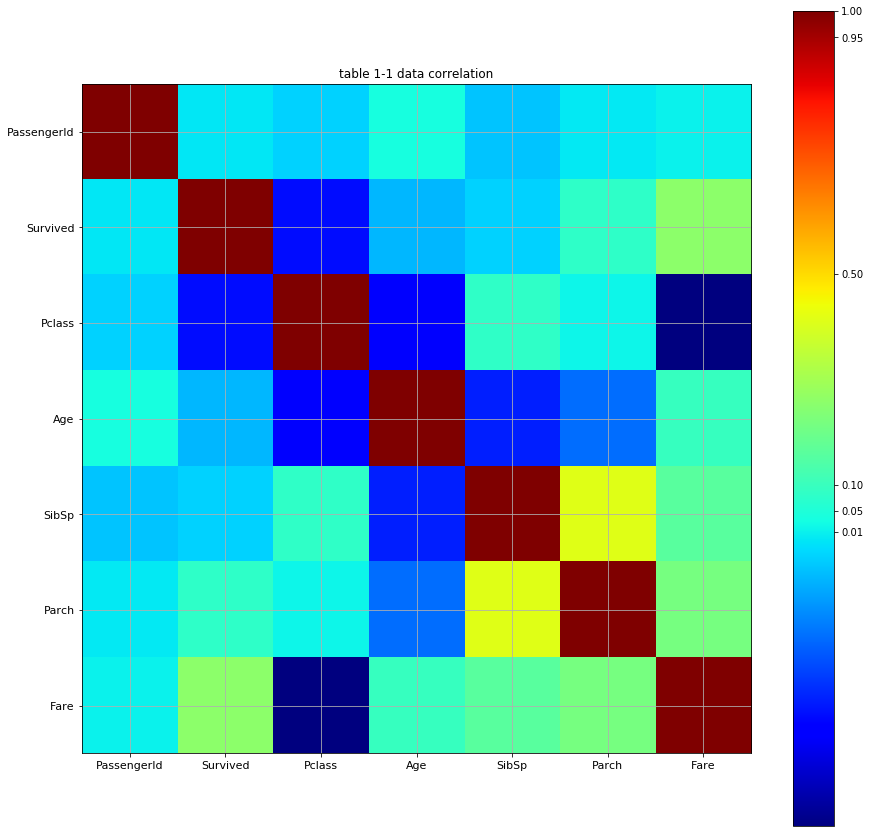

In [135]:
# 图形化皮尔逊积矩表
def correlation_matrix(df,labels):

    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax1 = fig.add_subplot(111) #一行一列的第一个
    cmap = cm.get_cmap('jet', 999)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('table 1-1 data correlation')
    #ax1.set_xticks(range(len(labels)))
    ax1.set_xticklabels(labels,fontsize=11)
    ax1.set_yticklabels(labels,fontsize=11)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.01,.05,.10,.50,.95,1])
    plt.show()

labels=['','PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
correlation_matrix(raw_data,labels)


### 由皮尔逊积矩得出相关系数，几个强关联的数据为Fare和Pclass（-0.549500）为强负相关，
### 即Fare（票价）越高，船仓等级越低（Pclass，等级越低越豪华，1最豪华）。
### 而与生还率相关的数据为Pclass，Fare，其他数据可能由于皮尔逊积矩存在局限性，需要进一步调查。

In [113]:
#get unique survived_ppl set of passenger id
survived_ppl = set()
for indexs in raw_data.index:
    if raw_data.loc[indexs].values[1] == 1:
        survived_ppl.add(raw_data.loc[indexs].values[0])
        
len(survived_ppl)

342

In [89]:
def getdata_1d_column(df,label):
    return df[[label]]

all_class = getdata_1d_column(raw_data,'Pclass')


Pclass    3
Name: 0, dtype: int64


In [105]:
print 'total first class number: ',len(raw_data.groupby('Pclass').groups[1])
print 'total second class number: ',len(raw_data.groupby('Pclass').groups[2])
print 'total third class number: ',len(raw_data.groupby('Pclass').groups[3])

total first class number:  216
total second class number:  184
total third class number:  491


In [125]:
def get_surviver_number_per_class(class_id):
    result = 0
    for index in raw_data.groupby('Pclass').groups[class_id]:
        if index+1 in survived_ppl:
            result += 1
    return result

total_first_class_surviver = get_surviver_number_per_class(1)
total_second_class_surviver = get_surviver_number_per_class(2)
total_third_class_surviver = get_surviver_number_per_class(3)

print 'total surviver numer for 3 clases : ', \
total_first_class_surviver,total_second_class_surviver,total_third_class_surviver

print 'total death number for 3 classes : ', 216-136, 184-87, 491-119



total surviver numer for 3 clases :  136 87 119
total death number for 3 classes :  80 97 372


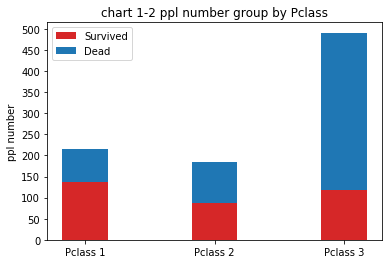

In [148]:
survive = (136, 87, 119)
dead = (80, 97, 372)
ind = np.arange(3)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survive, width, color='#d62728')
p2 = plt.bar(ind, dead, width,
             bottom=menMeans)

plt.ylabel('ppl number')
plt.title('chart 1-2 ppl number group by Pclass')
plt.xticks(ind, ('Pclass 1', 'Pclass 2', 'Pclass 3'))
plt.yticks(np.arange(0, 501, 50))
plt.legend((p1[0], p2[0]), ('Survived', 'Dead'))

plt.show()


### 由chart 1-2 数据得知Pclass 1的生还几率要高于Pclass 2 和 Pclass 3

In [156]:
# 去掉空值
def remove_empty_cells(dataframe, list_of_columns):
    for column in list_of_columns:
      dataframe[column] = dataframe[column].fillna(0)
    return dataframe

lists = ['Age','Cabin']

new_data = remove_empty_cells(raw_data,lists)


In [193]:
# get surviver_index_list
i = -1
surviver_index_list = set()
for index in new_data[['Survived']].values:
    i += 1  
    if index[0] == 1:
        surviver_index_list.add(i)


In [222]:
# get surviver age array
surviver_age_arr = []

for i in surviver_index_list:
    surviver_age_arr.append(new_data.loc[i].loc['Age'])
    
len(surviver_age_arr)


342

In [239]:
def number_counter(arr,min,max):
    counter = 0
    for i in arr:
        if i <= max and i > min:
            counter += 1
    return counter

num_surviver_0 = number_counter(surviver_age_arr,-1,0.0000)
num_surviver_0_10 = number_counter(surviver_age_arr,0.0000,10)
num_surviver_10_20 = number_counter(surviver_age_arr,10,20)
num_surviver_20_30 = number_counter(surviver_age_arr,20,30)
num_surviver_30_40 = number_counter(surviver_age_arr,30,40)
num_surviver_40_50 = number_counter(surviver_age_arr,40,50)
num_surviver_50_60 = number_counter(surviver_age_arr,50,60)
num_surviver_60_70 = number_counter(surviver_age_arr,60,70)
num_surviver_70_100 = number_counter(surviver_age_arr,70,100)

print "number of survivers in age ascend order:"
print num_surviver_0
print num_surviver_0_10
print num_surviver_10_20
print num_surviver_20_30
print num_surviver_30_40
print num_surviver_40_50
print num_surviver_50_60
print num_surviver_60_70
print num_surviver_70_100
print "total survivers"
print 52+38+44+69+33+17+4+84+1

print "survivers distributions in percentage form:"
print num_surviver_0/342.0
print num_surviver_0_10/342.0
print num_surviver_10_20/342.0
print num_surviver_20_30/342.0
print num_surviver_30_40/342.0
print num_surviver_40_50/342.0
print num_surviver_50_60/342.0
print num_surviver_60_70/342.0
print num_surviver_70_100/342.0

number of survivers in age ascend order:
52
38
44
84
69
33
17
4
1
total survivers
342
survivers distributions in percentage form:
0.152046783626
0.111111111111
0.12865497076
0.245614035088
0.201754385965
0.0964912280702
0.0497076023392
0.0116959064327
0.00292397660819


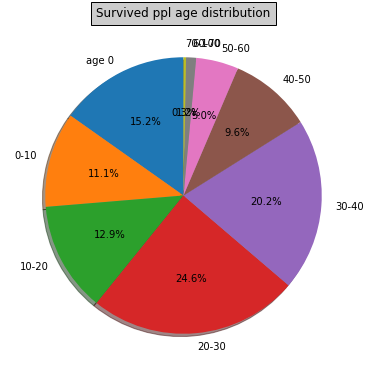

In [244]:

from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'age 0', '0-10', '10-20', '20-30','30-40','40-50','50-60','60-70','70-100'
fracs = [0.152046783626,0.111111111111, 0.12865497076, 0.245614035088, 0.201754385965,0.0964912280702,0.0497076023392\
         ,0.0116959064327,0.00292397660819]
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0)

pie(fracs, explode=explode,labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Survived ppl age distribution Pie chart 3-1', bbox={'facecolor':'0.8', 'pad':5})

show()



In [230]:
list_all_ages = new_data[['Age']].values
num_0 = number_counter(list_all_ages,-1,0.0000)
num_0_10 = number_counter(list_all_ages,0.0000,10)
num_10_20 = number_counter(list_all_ages,10,20)
num_20_30 = number_counter(list_all_ages,20,30)
num_30_40 = number_counter(list_all_ages,30,40)
num_40_50 = number_counter(list_all_ages,40,50)
num_50_60 = number_counter(list_all_ages,50,60)
num_60_70 = number_counter(list_all_ages,60,70)
num_70_100 = number_counter(list_all_ages,70,100)

print num_0
print num_0_10
print num_10_20
print num_20_30
print num_30_40
print num_40_50
print num_50_60
print num_60_70
print num_70_100

print 177+64+115+230+155+86+42+17+5

print num_0/891.0
print num_0_10/891.0
print num_10_20/891.0
print num_20_30/891.0
print num_30_40/891.0
print num_40_50/891.0
print num_50_60/891.0
print num_60_70/891.0
print num_70_100/891.0

177
64
115
230
155
86
42
17
5
891
0.198653198653
0.0718294051627
0.129068462402
0.258136924804
0.173961840629
0.0965207631874
0.047138047138
0.0190796857464
0.00561167227834


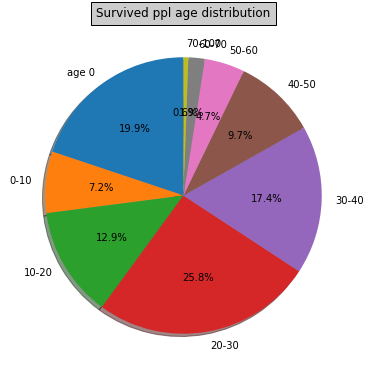

In [245]:

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = 'age 0', '0-10', '10-20', '20-30','30-40','40-50','50-60','60-70','70-100'
fracs = [0.198653198653,0.0718294051627,0.129068462402,0.258136924804,0.173961840629,0.0965207631874,0.047138047138\
         ,0.0190796857464,0.00561167227834]
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0)

pie(fracs, explode=explode,labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('total ppl age distribution pie chart 3-2', bbox={'facecolor':'0.8', 'pad':5})

show()




In [247]:
from decimal import Decimal

print Decimal(num_surviver_0)     /Decimal(num_0)
print Decimal(num_surviver_0_10)  /Decimal(num_0_10)
print Decimal(num_surviver_10_20) /Decimal(num_10_20)
print Decimal(num_surviver_20_30) /Decimal(num_20_30)
print Decimal(num_surviver_30_40) /Decimal(num_30_40)
print Decimal(num_surviver_40_50) /Decimal(num_40_50)
print Decimal(num_surviver_50_60) /Decimal(num_50_60)
print Decimal(num_surviver_60_70) /Decimal(num_60_70)
print Decimal(num_surviver_70_100)/Decimal(num_70_100)


0.2937853107344632768361581921
0.59375
0.3826086956521739130434782609
0.3652173913043478260869565217
0.4451612903225806451612903226
0.3837209302325581395348837209
0.4047619047619047619047619048
0.2352941176470588235294117647
0.2


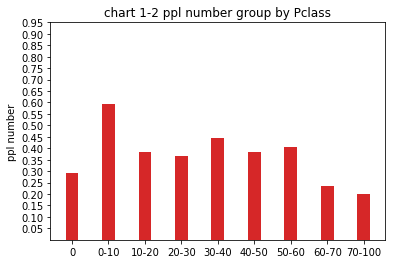

In [250]:
survive = (0.29379,0.5938,0.3826,0.3652,0.4452,0.3837,0.4048,0.2353,0.2)

ind = np.arange(9)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survive, width, color='#d62728')


plt.ylabel('age survive rate')
plt.title('chart 4-1 survived rate for each age range')
plt.xticks(ind, ('0', '0-10', '10-20','20-30','30-40','40-50','50-60','60-70','70-100'))
plt.yticks(np.arange(0.05, 1, 0.05))

plt.show()



### 由上图可以分析得出，年龄在0-10岁获救的概率略高